### 1. generate `predicted`, used at mAP repository

This step needs to be runed several times changing the `DETECTOR` and `LABEL` variables

In [72]:
folder = 'inferences'

DETECTOR = 'faster-rcnn-fpn' # retinanet, yolov3
LABEL = 'inria_person'

path = "%s/%s-%s.txt" % (folder, LABEL, DETECTOR)

predicted_folder = '/home/lrs14/mAP/predicted/'
with open(path) as f:
  rows = [line[:-1] for line in f]
  f = None
  for row in rows:
    if 'png' in row:
      path = predicted_folder + row.replace('png', 'txt')
      if f is not None:
        f.close()
      f = open(path, 'w')
    else:
        values = row.split(' ')
        xmin = int(float(values[0]))
        ymin = int(float(values[1]))
        xmax = int(float(values[2]))
        ymax = int(float(values[3]))
        result = "%s %s %d %d %d %d\n" % (LABEL, values[4], xmin, ymin, xmax, ymax)
        f.write(result)
if f is not None:
  f.close()

#### !!! (at mAP folder)
```
python main.py
mv *.json detector/
mv results detector/LABEL-results
```

### 2. combine results to the same plot

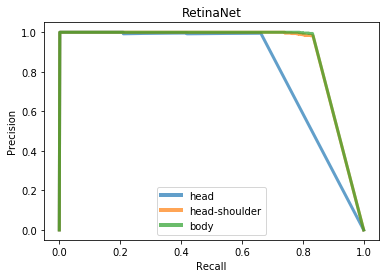

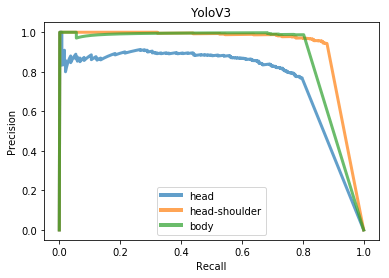

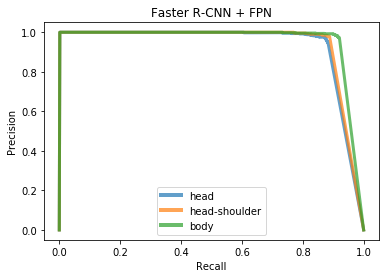

In [76]:
import matplotlib.pyplot as plt
import json

labels = ['head', 'shoulder', 'inria_person']
detectors = ['retinanet', 'yolov3', 'faster-rcnn-fpn']

# workaround
detector_labels = {
  'retinanet': 'RetinaNet',
  'yolov3': 'YoloV3',
  'faster-rcnn-fpn': 'Faster R-CNN + FPN'
}

legend_labels = {
  'head': 'head',
  'shoulder': 'head-shoulder',
  'inria_person': 'body'
}

for detector in detectors:
  for LABEL in labels:  
    json_data = open('/home/lrs14/mAP/' + detector + '/' + LABEL + '-rec-prec.json').read()
    data = json.loads(json_data)

    rec = data['rec']
    prec = data['prec']

    plt.plot(rec, prec, alpha=0.7, label=legend_labels[LABEL], linewidth=3.0)

  plt.title(detector_labels[detector])
  plt.xlabel('Recall')
  plt.ylabel('Precision')

  leg = plt.legend()

  for line in leg.get_lines():
      line.set_linewidth(4)

  plt.show()